In [221]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [222]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [223]:
NUM_CLASSES = 6

# 入力長

In [224]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [225]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [226]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [228]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [229]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 24)                792       
                                                                 
 dropout_23 (Dropout)        (None, 24)                0         
                                                                 
 dense_34 (Dense)            (None, 10)                250       
                                                                 
 dense_35 (Dense)            (None, 6)                 66        
                                                                 
Total params: 1108 (4.33 KB)
Trainable params: 1108 (4.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [230]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [231]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [232]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/38 [..............................] - ETA: 12s - loss: 1.7846 - accuracy: 0.2109
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
38/38 [==============================] - 1s 4ms/step - loss: 1.7665 - accuracy: 0.3135 - val_loss: 1.7304 - val_accuracy: 0.3251
Epoch 2/1000
 1/38 [..............................] - ETA: 0s - loss: 1.7394 - accuracy: 0.3281
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
38/38 [==============================] - 0s 2ms/step - loss: 1.7091 - accuracy: 0.3205 - val_loss: 1.6758 - val_accuracy: 0.3134
Epoch 3/1000
 1/38 [..............................] - ETA: 0s - loss: 1.6916 - accuracy: 0.3125
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
38/38 [==============================] - 0s 2ms/step - loss: 1.6554 - accuracy: 0.3168 - val_loss: 1.6238 - val_accuracy: 0.2980
Epoch 4/1000
 1/38 [..............................] - ETA: 0s - lo

c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to model/point_history_classifier\point_history_classifier.hdf5
38/38 [==============================] - 0s 2ms/step - loss: 1.6061 - accuracy: 0.3273 - val_loss: 1.5784 - val_accuracy: 0.3325
Epoch 5/1000
 1/38 [..............................] - ETA: 0s - loss: 1.5704 - accuracy: 0.3594
Epoch 5: saving model to model/point_history_classifier\point_history_classifier.hdf5
38/38 [==============================] - 0s 2ms/step - loss: 1.5800 - accuracy: 0.3234 - val_loss: 1.5420 - val_accuracy: 0.3572
Epoch 6/1000
 1/38 [..............................] - ETA: 0s - loss: 1.5008 - accuracy: 0.3516
Epoch 6: saving model to model/point_history_classifier\point_history_classifier.hdf5
38/38 [==============================] - 0s 2ms/step - loss: 1.5510 - accuracy: 0.3390 - val_loss: 1.5083 - val_accuracy: 0.3874
Epoch 7/1000
 1/38 [..............................] - ETA: 0s - loss: 1.5389 - accuracy: 0.3906
Epoch 7: saving model to model/point_history_classifier\point_hist

In [233]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [234]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 35ms/step
[1.4544821e-03 6.6524657e-04 9.2505479e-01 4.8452564e-02 2.4372810e-02
 1.5302751e-14]
2


# 混同行列

51/51 [==============================] - 0s 580us/step


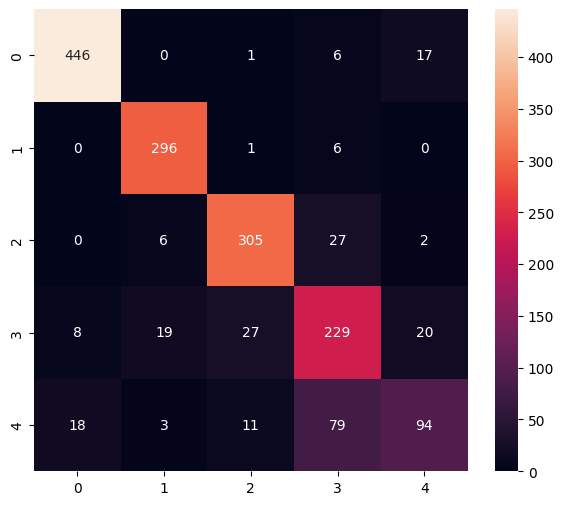

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       470
           1       0.91      0.98      0.94       303
           2       0.88      0.90      0.89       340
           3       0.66      0.76      0.70       303
           4       0.71      0.46      0.56       205

    accuracy                           0.85      1621
   macro avg       0.82      0.81      0.81      1621
weighted avg       0.84      0.85      0.84      1621



In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [236]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [237]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [238]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Ck\AppData\Local\Temp\tmp5ri3ifb2\assets


INFO:tensorflow:Assets written to: C:\Users\Ck\AppData\Local\Temp\tmp5ri3ifb2\assets


6600

# 推論テスト

In [239]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [240]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_12:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [241]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [242]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [243]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.4544808e-03 6.6524599e-04 9.2505491e-01 4.8452500e-02 2.4372784e-02
 1.5302694e-14]
2
